In [35]:
import numpy as np 
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
os.listdir('../data')

['data-science-bowl-2019.zip',
 'test.csv',
 'sample_submission.csv',
 'train_labels.csv',
 'train.csv',
 'specs.csv']

In [5]:
df_train = pd.read_csv('../data/train.csv')

In [6]:
df_train.shape

(11341042, 11)

In [7]:
df_train.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,45bb1e1b6b50c07b,2019-09-06T17:53:46.937Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,17eeb7f223665f53,2019-09-06T17:54:17.519Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,77261ab5,0848ef14a8dc6892,2019-09-06T17:54:56.302Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK
3,b2dba42b,0848ef14a8dc6892,2019-09-06T17:54:56.387Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06T17:55:03.253Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK


In [9]:
df_train['timestamp1'] = df_train['timestamp'].map(lambda x: pd.Timestamp(x))

In [14]:
df_train['timestamp1'][0]

Timestamp('2019-09-06 17:53:46.937000+0000', tz='UTC')

In [40]:
df_train['day'] = df_train['timestamp1'].map(lambda x: x.day)
df_train['month'] = df_train['timestamp1'].map(lambda x: x.month)
# df_train['year'] = df_train['timestamp1'].map(lambda x: x.year)
# hour, minute, second, microsecond 

# asm8	Return numpy datetime64 format in nanoseconds.
# dayofweek	Return day of whe week.
# dayofyear	Return the day of the year.
# days_in_month	Return the number of days in the month.
# daysinmonth	Return the number of days in the month.
# freqstr	Return the total number of days in the month.
# is_leap_year	Return True if year is a leap year.
# is_month_end	Return True if date is last day of month.
# is_month_start	Return True if date is first day of month.
# is_quarter_end	Return True if date is last day of the quarter.
# is_quarter_start	Return True if date is first day of the quarter.
# is_year_end	Return True if date is last day of the year.
# is_year_start	Return True if date is first day of the year.
# quarter	Return the quarter of the year.
# resolution	Return resolution describing the smallest difference between two times that can be represented by Timestamp object_state
# tz	Alias for tzinfo
# week	Return the week number of the year.
# weekday_name	(DEPRECATED) .. deprecated:: 0.23.0
# weekofyear	Return the week number of the year.

df_train['hour'] = df_train['timestamp1'].map(lambda x: x.hour)
df_train['minute'] = df_train['timestamp1'].map(lambda x: x.minute)
df_train['second'] = df_train['timestamp1'].map(lambda x: x.second)
df_train['microsecond'] = df_train['timestamp1'].map(lambda x: x.microsecond)
df_train['week'] = df_train['timestamp1'].map(lambda x: x.week)
df_train['dayofweek'] = df_train['timestamp1'].map(lambda x: x.dayofweek)
df_train['dayofyear'] = df_train['timestamp1'].map(lambda x: x.dayofyear)
df_train['is_month_end'] = df_train['timestamp1'].map(lambda x: x.is_month_end)
df_train['is_month_start'] = df_train['timestamp1'].map(lambda x: x.is_month_start)
df_train['is_quarter_end'] = df_train['timestamp1'].map(lambda x: x.is_quarter_end)
df_train['is_quarter_start'] = df_train['timestamp1'].map(lambda x: x.is_quarter_start)
# df_train['is_year_end'] = df_train['timestamp1'].map(lambda x: x.is_year_end)
# df_train['weekday_name'] = df_train['timestamp'].weekday_name

In [ ]:
df_train.head()

In [22]:
for col in list(df_train.columns):
    print(col, df_train[col].nunique())

event_id 384
game_session 303319
timestamp 10777308
event_data 10893749
installation_id 17000
event_count 3368
event_code 42
game_time 834048
title 44
type 4
world 4
timestamp1 10777308
day 31
month 4
year 1
hour 24
minute 60
second 60
microsecond 696
week 14
dayofweek 7
dayofyear 85
is_month_end 2
is_month_start 2
is_quarter_end 2
is_quarter_start 2
is_year_end 1


In [23]:
df_test = pd.read_csv('../data/test.csv')

In [26]:
df_test.head(1)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,0ea9ecc81a565215,2019-09-10T16:50:24.910Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE


In [27]:
df_test.loc[df_test.installation_id == '00abaee7']

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,0ea9ecc81a565215,2019-09-10T16:50:24.910Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,c1ea43d8b8261d27,2019-09-10T16:50:55.503Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,27253bdc,7ed86c6b72e725e2,2019-09-10T16:51:51.805Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 2,Clip,MAGMAPEAK
3,27253bdc,7e516ace50e7fe67,2019-09-10T16:53:12.825Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Crystal Caves - Level 1,Clip,CRYSTALCAVES
4,7d093bf9,a022c3f60ba547e7,2019-09-10T16:54:12.115Z,"{""version"":""1.0"",""round"":0,""event_count"":1,""ga...",00abaee7,1,2000,0,Chow Time,Game,CRYSTALCAVES
5,f93fc684,a022c3f60ba547e7,2019-09-10T16:54:14.338Z,"{""coordinates"":{""x"":515,""y"":697,""stage_width"":...",00abaee7,2,4010,2232,Chow Time,Game,CRYSTALCAVES
6,7ec0c298,a022c3f60ba547e7,2019-09-10T16:54:16.553Z,"{""description"":""It's Chow Time! We have some V...",00abaee7,3,3010,4445,Chow Time,Game,CRYSTALCAVES
7,0d1da71f,a022c3f60ba547e7,2019-09-10T16:54:23.364Z,"{""description"":""It's Chow Time! We have some V...",00abaee7,4,3110,11251,Chow Time,Game,CRYSTALCAVES
8,63f13dd7,a022c3f60ba547e7,2019-09-10T16:54:23.365Z,"{""dinosaur"":""stacey"",""diet"":""herbivore"",""targe...",00abaee7,5,2020,11251,Chow Time,Game,CRYSTALCAVES
9,7372e1a5,a022c3f60ba547e7,2019-09-10T16:54:25.029Z,"{""coordinates"":{""x"":901,""y"":449,""stage_width"":...",00abaee7,6,4070,12929,Chow Time,Game,CRYSTALCAVES


In [61]:
df_test_1 = df_test.loc[df_test.installation_id == '00abaee7']

In [72]:
df_test_1.query('event_id == "f93fc684"').event_data.iloc[0]

'{"coordinates":{"x":515,"y":697,"stage_width":1015,"stage_height":762},"round":0,"event_count":2,"game_time":2232,"event_code":4010}'

In [28]:
df_train_labels = pd.read_csv('../data/train_labels.csv')

In [29]:
df_train_labels.head()

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.0,0
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),1,1,0.5,2
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1,0,1.0,3


In [30]:
df_train_labels['installation_id'].nunique()

3614

In [31]:
df_train['installation_id'].nunique()

17000

In [32]:
df_test['installation_id'].nunique()

1000

In [33]:
df_train_labels['game_session'].nunique()

17690

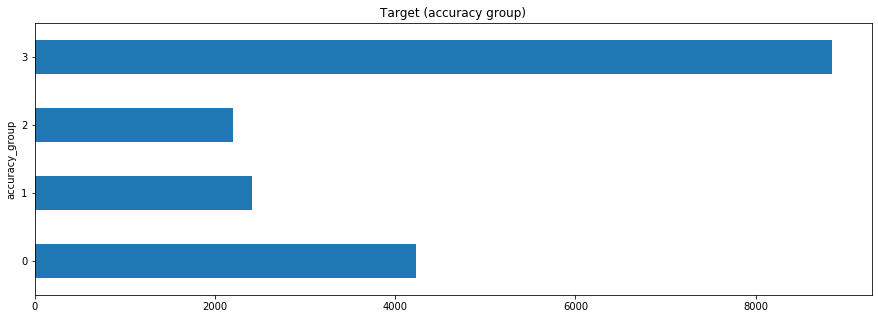

In [36]:
df_train_labels.groupby('accuracy_group')['game_session'].count() \
    .plot(kind='barh', figsize=(15, 5), title='Target (accuracy group)')
plt.show()


In [37]:
df_train['event_id_as_int'] = df_train['event_id'].apply(lambda x: int(x, 16))
df_train['game_session_as_int'] = df_train['game_session'].apply(lambda x: int(x, 16))

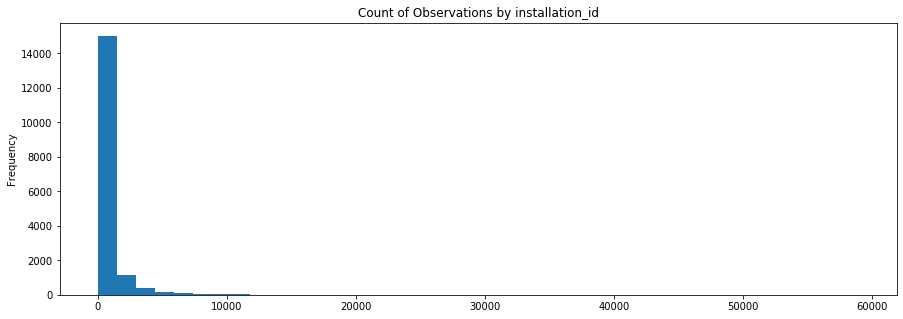

In [41]:
df_train.groupby('installation_id') \
    .count()['event_id'] \
    .plot(kind='hist',
          bins=40,
          figsize=(15, 5),
         title='Count of Observations by installation_id')
plt.show()

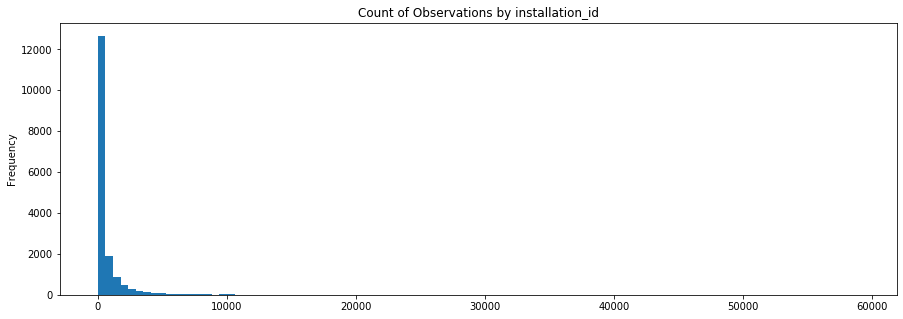

In [42]:
df_train.groupby('installation_id') \
    .count()['event_id'] \
    .plot(kind='hist',
          bins=100,
          figsize=(15, 5),
         title='Count of Observations by installation_id')
plt.show()

In [43]:
df_train.groupby('installation_id').count()

,event_id,game_session,timestamp,event_data,event_count,event_code,game_time,title,type,world,...,week,dayofweek,dayofyear,is_month_end,is_month_start,is_quarter_end,is_quarter_start,is_year_end,event_id_as_int,game_session_as_int
installation_id,,,,,,,,,,,,,,,,,,,,,
0001e90f,1357,1357,1357,1357,1357,1357,1357,1357,1357,1357,...,1357,1357,1357,1357,1357,1357,1357,1357,1357,1357
000447c4,181,181,181,181,181,181,181,181,181,181,...,181,181,181,181,181,181,181,181,181,181
0006a69f,3801,3801,3801,3801,3801,3801,3801,3801,3801,3801,...,3801,3801,3801,3801,3801,3801,3801,3801,3801,3801
0006c192,2224,2224,2224,2224,2224,2224,2224,2224,2224,2224,...,2224,2224,2224,2224,2224,2224,2224,2224,2224,2224
0009a5a9,412,412,412,412,412,412,412,412,412,412,...,412,412,412,412,412,412,412,412,412,412
0011edc8,63,63,63,63,63,63,63,63,63,63,...,63,63,63,63,63,63,63,63,63,63
00129856,830,830,830,830,830,830,830,830,830,830,...,830,830,830,830,830,830,830,830,830,830
0016b7cc,947,947,947,947,947,947,947,947,947,947,...,947,947,947,947,947,947,947,947,947,947
00195df7,248,248,248,248,248,248,248,248,248,248,...,248,248,248,248,248,248,248,248,248,248


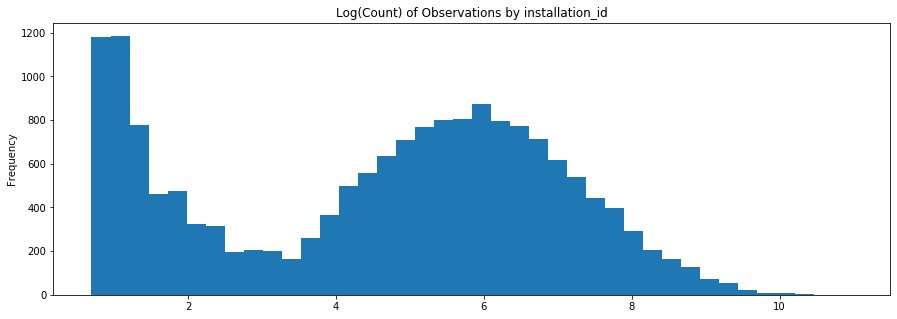

In [45]:
df_train.groupby('installation_id') \
    .count()['event_id'] \
    .apply(np.log1p) \
    .plot(kind='hist',
          bins=40,
         figsize=(15, 5),
         title='Log(Count) of Observations by installation_id')
plt.show()

In [47]:
df_train.groupby('installation_id') \
    .count()['event_id'].sort_values(ascending=False).head(5)

installation_id
f1c21eda    58988
4d7d3d97    32749
d25338cb    31826
cff5a334    30918
c9ea32e9    30402
Name: event_id, dtype: int64

In [48]:
df_train.query('installation_id == "f1c21eda"')

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,...,week,dayofweek,dayofyear,is_month_end,is_month_start,is_quarter_end,is_quarter_start,is_year_end,event_id_as_int,game_session_as_int
10680753,27253bdc,b894736313219eae,2019-08-11T06:06:35.013Z,"{""event_code"": 2000, ""event_count"": 1}",f1c21eda,1,2000,0,Welcome to Lost Lagoon!,Clip,...,32,6,223,False,False,False,False,False,656751580,13300382468891844270
10680754,27253bdc,323eab9744201a71,2019-08-11T06:07:12.987Z,"{""event_code"": 2000, ""event_count"": 1}",f1c21eda,1,2000,0,Tree Top City - Level 1,Clip,...,32,6,223,False,False,False,False,False,656751580,3620519816623823473
10680755,b7dc8128,36d3ea5b852c8fa8,2019-08-11T06:07:57.167Z,"{""version"":""1.0"",""round"":0,""event_count"":1,""ga...",f1c21eda,1,2000,0,All Star Sorting,Game,...,32,6,223,False,False,False,False,False,3084681512,3950758976931270568
10680756,4b5efe37,36d3ea5b852c8fa8,2019-08-11T06:08:01.191Z,"{""coordinates"":{""x"":566,""y"":652,""stage_width"":...",f1c21eda,2,4010,5037,All Star Sorting,Game,...,32,6,223,False,False,False,False,False,1264516663,3950758976931270568
10680757,2c4e6db0,36d3ea5b852c8fa8,2019-08-11T06:08:03.487Z,"{""houses"":[5,2,1],""dinosaurs"":[{""name"":""petey""...",f1c21eda,3,2020,7170,All Star Sorting,Game,...,32,6,223,False,False,False,False,False,743337392,3950758976931270568
10680758,363d3849,36d3ea5b852c8fa8,2019-08-11T06:08:03.494Z,"{""media_type"":""animation"",""total_duration"":410...",f1c21eda,4,3010,7170,All Star Sorting,Game,...,32,6,223,False,False,False,False,False,909981769,3950758976931270568
10680759,9e4c8c7b,36d3ea5b852c8fa8,2019-08-11T06:08:08.009Z,"{""media_type"":""animation"",""duration"":4654,""des...",f1c21eda,5,3110,11825,All Star Sorting,Game,...,32,6,223,False,False,False,False,False,2655816827,3950758976931270568
10680760,363d3849,36d3ea5b852c8fa8,2019-08-11T06:08:08.012Z,"{""media_type"":""animation"",""total_duration"":400...",f1c21eda,6,3010,11825,All Star Sorting,Game,...,32,6,223,False,False,False,False,False,909981769,3950758976931270568
10680761,587b5989,36d3ea5b852c8fa8,2019-08-11T06:08:10.713Z,"{""coordinates"":{""x"":825,""y"":652,""stage_width"":...",f1c21eda,7,4070,14517,All Star Sorting,Game,...,32,6,223,False,False,False,False,False,1484478857,3950758976931270568
10680762,587b5989,36d3ea5b852c8fa8,2019-08-11T06:08:11.894Z,"{""coordinates"":{""x"":813,""y"":644,""stage_width"":...",f1c21eda,8,4070,15698,All Star Sorting,Game,...,32,6,223,False,False,False,False,False,1484478857,3950758976931270568


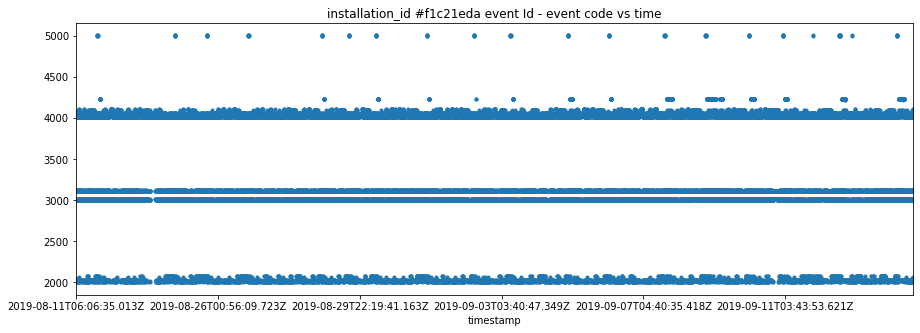

In [49]:
df_train.query('installation_id == "f1c21eda"') \
    .set_index('timestamp')['event_code'] \
    .plot(figsize=(15, 5),
          title='installation_id #f1c21eda event Id - event code vs time',
         style='.')
plt.show()

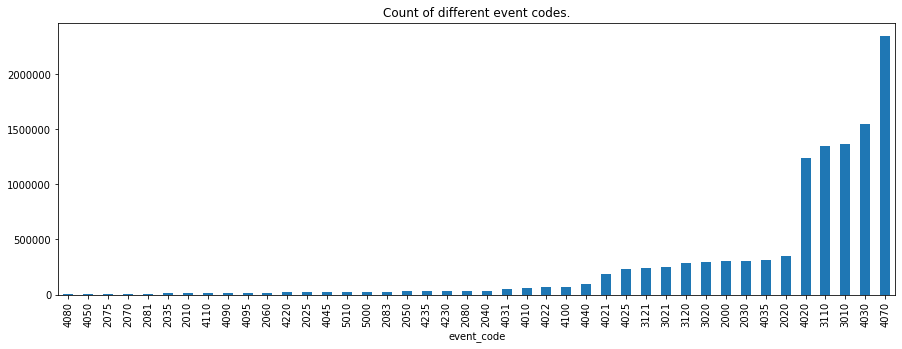

In [50]:
df_train.groupby('event_code') \
    .count()['event_id'] \
    .sort_values() \
    .plot(kind='bar',
         figsize=(15, 5),
         title='Count of different event codes.')
plt.show()

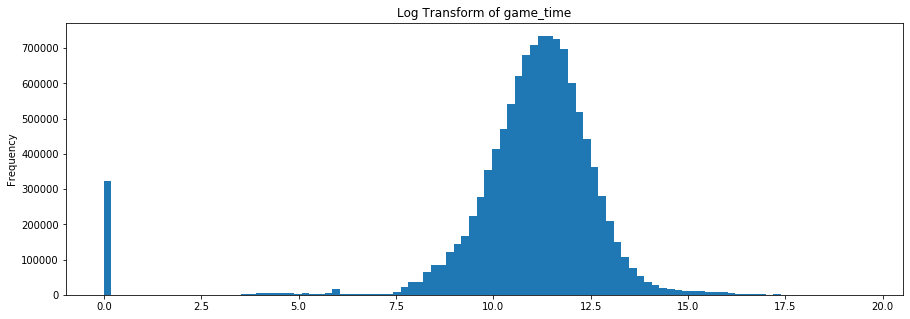

In [52]:
df_train['game_time'].apply(np.log1p) \
    .plot(kind='hist',
          figsize=(15, 5),
          bins=100,
          title='Log Transform of game_time')
plt.show()

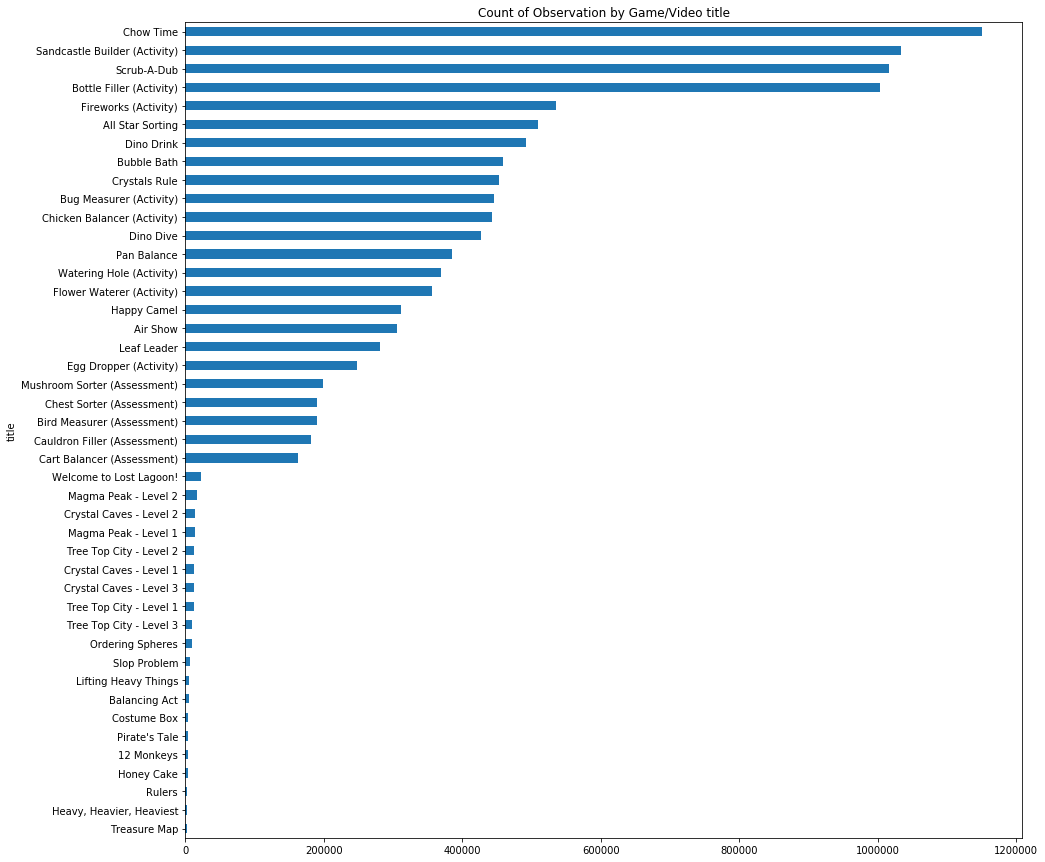

In [54]:
df_train.groupby('title')['event_id'] \
    .count() \
    .sort_values() \
    .plot(kind='barh',
          title='Count of Observation by Game/Video title',
         figsize=(15, 15))
plt.show()

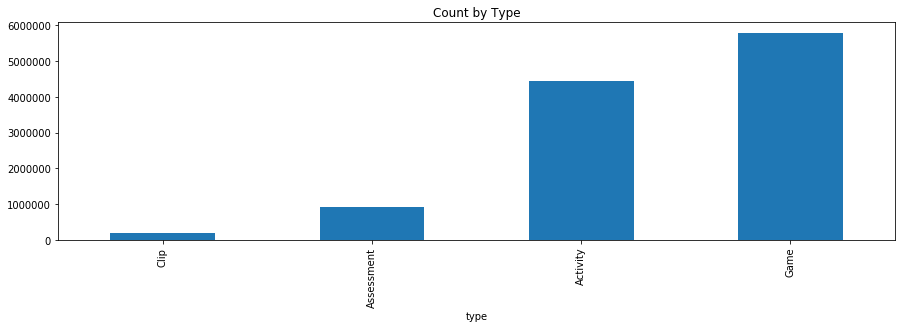

In [55]:
df_train.groupby('type')['event_id'] \
    .count() \
    .sort_values() \
    .plot(kind='bar',
          figsize=(15, 4),
          title='Count by Type')
plt.show()

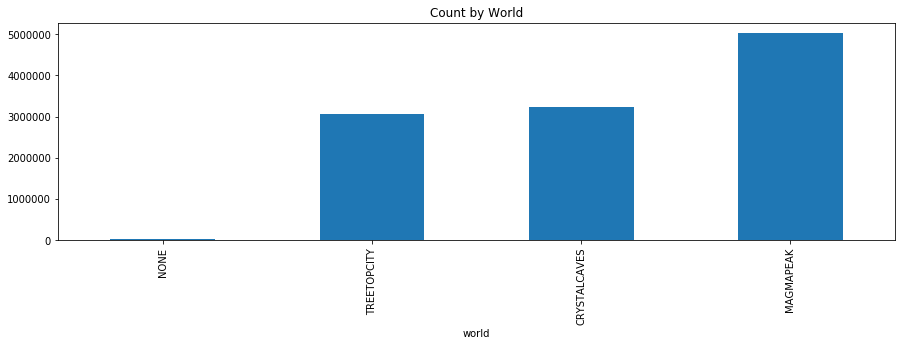

In [57]:
df_train.groupby('world')['event_id'] \
    .count() \
    .sort_values() \
    .plot(kind='bar',
          figsize=(15, 4),
          title='Count by World')
plt.show()

In [58]:
df_specs = pd.read_csv('../data/specs.csv')

In [59]:
df_specs.shape

(386, 3)

In [60]:
df_specs.head()

,event_id,info,args
0,2b9272f4,The end of system-initiated feedback (Correct)...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
1,df4fe8b6,The end of system-initiated feedback (Incorrec...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
2,3babcb9b,The end of system-initiated instruction event ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
3,7f0836bf,The end of system-initiated instruction event ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
4,ab3136ba,The end of system-initiated instruction event ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."


In [74]:
df_train.head().T

,0,1,2,3,4
event_id,27253bdc,27253bdc,77261ab5,b2dba42b,1bb5fbdb
game_session,45bb1e1b6b50c07b,17eeb7f223665f53,0848ef14a8dc6892,0848ef14a8dc6892,0848ef14a8dc6892
timestamp,2019-09-06T17:53:46.937Z,2019-09-06T17:54:17.519Z,2019-09-06T17:54:56.302Z,2019-09-06T17:54:56.387Z,2019-09-06T17:55:03.253Z
event_data,"{""event_code"": 2000, ""event_count"": 1}","{""event_code"": 2000, ""event_count"": 1}","{""version"":""1.0"",""event_count"":1,""game_time"":0...","{""description"":""Let's build a sandcastle! Firs...","{""description"":""Let's build a sandcastle! Firs..."
installation_id,0001e90f,0001e90f,0001e90f,0001e90f,0001e90f
event_count,1,1,1,2,3
event_code,2000,2000,2000,3010,3110
game_time,0,0,0,53,6972
title,Welcome to Lost Lagoon!,Magma Peak - Level 1,Sandcastle Builder (Activity),Sandcastle Builder (Activity),Sandcastle Builder (Activity)
type,Clip,Clip,Activity,Activity,Activity
